In [1]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://azwnnln0cat-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [2]:
!pip install flask-ngrok

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install face_recognition

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import face_recognition
import pickle
import os
import cv2


KNOWN_FACES_DIR = '/content/drive/MyDrive/Server/static/dataset/train'
UNKNOWN_FACES_DIR = '/content/drive/MyDrive/Server/static/dataset/test'
TOLERANCE = 0.5
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = 'cnn'

known_faces = []
known_names = []
def add_face(image_path, id):
    image = face_recognition.load_image_file(image_path)
    
    encoding = face_recognition.face_encodings(image)
    if len(encoding) > 0:
        encoding = encoding[0]
    else:
        return
    known_faces.append(encoding)
    known_names.append(id)

def find_face(image_path):
    image = face_recognition.load_image_file(image_path)

    locations = face_recognition.face_locations(image, model=MODEL)
    encodings = face_recognition.face_encodings(image, locations)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    match = False
    print(f'found {len(encodings)} face(s)')
    for face_encoding, face_location in zip(encodings, locations):

        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)

        if True in results:

            match = known_names[results.index(True)]

            top_left = (face_location[3], face_location[0])
            bottom_right = (face_location[1], face_location[2])

            cv2.rectangle(image, top_left, bottom_right, 255, FRAME_THICKNESS)

            top_left = (face_location[3], face_location[2])
            bottom_right = (face_location[1], face_location[2] + 22)

            cv2.rectangle(image, top_left, bottom_right, 255, cv2.FILLED)

            #cv2.putText(image, match, (face_location[3] + 10, face_location[2] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), FONT_THICKNESS)
    imgplot = plt.imshow(image)
    plt.show()
    cv2.imwrite("/content/drive/MyDrive/Server/static/dataset/answer/ans.jpg", image)
    return match

def load_data():
    file1 = open("/content/drive/MyDrive/Server/static/dataset/pretrained/known_faces.pkl", "rb")
    file2 = open("/content/drive/MyDrive/Server/static/dataset/pretrained/known_names.pkl", "rb")
    known_faces = pickle.load(file1)
    known_names = pickle.load(file2)
    file1.close()
    file2.close()
    
def add_data(path):
    id = path.split('_')[0]
    print(id)
    add_face(path, id)

def train_data():
    for name in os.listdir(KNOWN_FACES_DIR):
        id = name.split('_')[0]
        print(id)
        
        add_face(f'{KNOWN_FACES_DIR}/{name}', id)

        file1 = open("/content/drive/MyDrive/Server/static/dataset/pretrained/known_faces.pkl", "wb")
        file2 = open("/content/drive/MyDrive/Server/static/dataset/pretrained/known_names.pkl", "wb")
        pickle.dump(known_faces, file1)
        pickle.dump(known_names, file2)
        file1.close()
        file2.close()
        
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import face_recognition
import pickle
import os
import cv2


KNOWN_FACES_DIR = '/content/drive/MyDrive/Server/static/dataset/train'
UNKNOWN_FACES_DIR = '/content/drive/MyDrive/Server/static/dataset/test'
TOLERANCE = 0.5
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = 'cnn'

known_faces = []
known_names = []
def add_face(image_path, id):
    image = face_recognition.load_image_file(image_path)
    
    encoding = face_recognition.face_encodings(image)
    if len(encoding) > 0:
        encoding = encoding[0]
    else:
        return
    known_faces.append(encoding)
    known_names.append(id)

def find_face(image_path):
    image = face_recognition.load_image_file(image_path)

    locations = face_recognition.face_locations(image, model=MODEL)
    encodings = face_recognition.face_encodings(image, locations)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    match = False
    print(f'found {len(encodings)} face(s)')
    for face_encoding, face_location in zip(encodings, locations):

        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)

        if True in results:
          
            match = known_names[results.index(True)]

            top_left = (face_location[3], face_location[0])
            bottom_right = (face_location[1], face_location[2])

            cv2.rectangle(image, top_left, bottom_right, 255, FRAME_THICKNESS)

            top_left = (face_location[3], face_location[2])
            bottom_right = (face_location[1], face_location[2] + 22)

            cv2.rectangle(image, top_left, bottom_right, 255, cv2.FILLED)

            #cv2.putText(image, match, (face_location[3] + 10, face_location[2] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), FONT_THICKNESS)
    imgplot = plt.imshow(image)
    plt.show()
    cv2.imwrite("/content/drive/MyDrive/Server/static/dataset/answer/ans.jpg", image)
    return match

def load_data():
    file1 = open("/content/drive/MyDrive/Server/static/dataset/pretrained/known_faces.pkl", "rb")
    file2 = open("/content/drive/MyDrive/Server/static/dataset/pretrained/known_names.pkl", "rb")
    known_faces = pickle.load(file1)
    known_names = pickle.load(file2)
    file1.close()
    file2.close()
    
def add_data(path):
    id = path.split('_')[0]
    print(id)
    add_face(path, id)

def train_data():
    for name in os.listdir(KNOWN_FACES_DIR):
        id = name.split('_')[0]
        print(id)
        
        add_face(f'{KNOWN_FACES_DIR}/{name}', id)

        file1 = open("/content/drive/MyDrive/Server/static/dataset/pretrained/known_faces.pkl", "wb")
        file2 = open("/content/drive/MyDrive/Server/static/dataset/pretrained/known_names.pkl", "wb")
        pickle.dump(known_faces, file1)
        pickle.dump(known_names, file2)
        file1.close()
        file2.close()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://92a41234a107.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [29/Nov/2020 06:45:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 06:45:44] "GET /static/js/jquery.min.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 06:45:44] "GET /static/js/popper.min.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 06:45:44] "GET /static/js/bootstrap.min.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 06:45:44] "GET /static/js/mdb.min.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 06:45:45] "GET /favicon.ico HTTP/1.1" 404 -


['http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/', 'http://92a41234a107.ngrok.io/']
found 1 face(s)


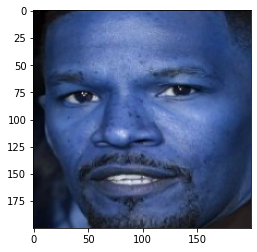

127.0.0.1 - - [29/Nov/2020 06:46:00] "POST / HTTP/1.1" 200 -


In [ ]:
from flask import Flask, render_template, request, redirect, url_for, send_from_directory
from flask_ngrok import run_with_ngrok
import os
import time
app = Flask(__name__, template_folder = "/content/drive/MyDrive/Server/templates", static_folder = "/content/drive/MyDrive/Server/static")
run_with_ngrok(app)
ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif'])

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1] in ALLOWED_EXTENSIONS

@app.route('/', methods=['GET', 'POST'])
def upload_file():
    if request.method == 'POST':
        links = list()
        for i in range(10):
          links.append(request.form[str("url" + str(i))])
        print(links)
        file = request.files['file']
        if file and allowed_file(file.filename):
            filename = file.filename
            path = os.path.join("/content/drive/MyDrive/Server/static/dataset/test", filename)
            file.save(path)
            find_face(path)
            time.sleep(0.2)
            return render_template("index.html", url = "static/dataset/answer/ans.jpg")
    return render_template("index.html")


if __name__ == '__main__':
    load_data()
    app.run()